#### 查看有无gpu以及是否与torch版本匹配

In [4]:
import torch

In [5]:
torch.cuda.is_available()

False

In [85]:
from tqdm import tqdm_notebook

In [86]:
import time

In [87]:
for i in tqdm_notebook(range(60*10)):
    time.sleep(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


# Lecture-09: Convolutional Neural Networks and How to recognize images

## How can computer recognize images?

+ Image Classification 图像分类
+ Localization 图像定位
+ Object Detection 目标检测
+ Instance Segmentation 分割

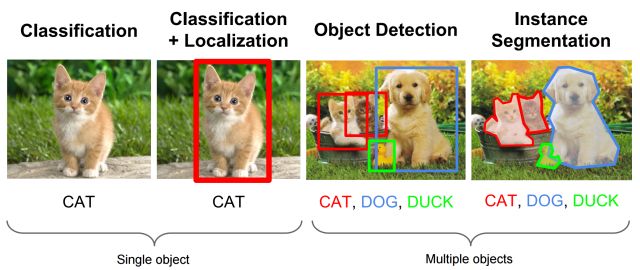

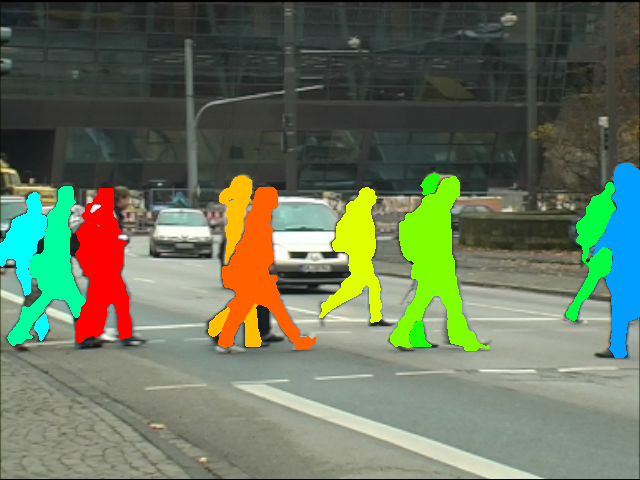

### Tracking
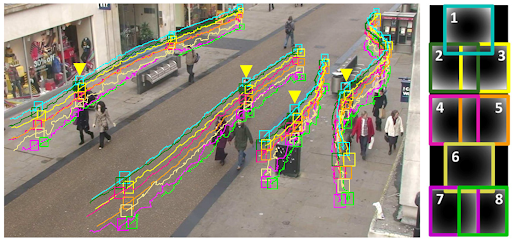

### Style Transfer
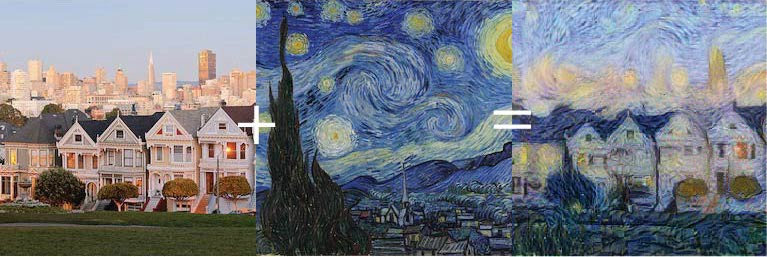

## 卷积神经网络 CNN Convolutional Neural Networks

+ 卷积神经网络 CNN
+ ResNet Inception 机制
+ 迁移学习 Transfer Learning
+ 图像检测与图像分割 Image Detection and Segmentation

#### If we have a very simple image

In [7]:
import numpy as np

In [8]:
simple_image = np.array([
    [3,0,1,2,7,4],
    [1,5,8,9,8,1],
    [2,7,2,5,8,3],
    [0,9,3,1,2,8],
    [4,6,1,6,2,8],
    [2,7,5,2,3,9]
])

In [9]:
import matplotlib.pyplot as plt

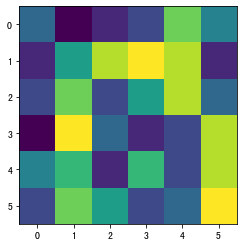

In [10]:
plt.imshow(simple_image)

In [11]:
filter_ = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

$$filter_ = [[f_{00},f_{01},f_{02}],[f_{10},f_{11},f_{12}],[f_{20},f_{21},f_{22}]]$$
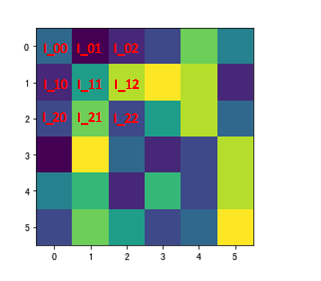
$$Output = I_{00} * f_{00} + I_{01} * f_{01} + ... + I_{22} * f_{22}$$

#### 上述求Output的过程在计算机中就叫做卷积操作

In [12]:
# Input
simple_image[:3,:3]

array([[3, 0, 1],
       [1, 5, 8],
       [2, 7, 2]])

In [14]:
# 对应位置相乘的操作
np.multiply(simple_image[:3,:3],filter_)

array([[ 3,  0, -1],
       [ 1,  0, -8],
       [ 2,  0, -2]])

In [15]:
# 求和得到Output
np.sum(np.multiply(simple_image[:3,:3],filter_))

-5

In [17]:
for h in range(simple_image.shape[0] - filter_.shape[0] + 1):
    print (np.multiply(simple_image[h:h+3,:3],filter_))

[[ 3  0 -1]
 [ 1  0 -8]
 [ 2  0 -2]]
[[ 1  0 -8]
 [ 2  0 -2]
 [ 0  0 -3]]
[[ 2  0 -2]
 [ 0  0 -3]
 [ 4  0 -1]]
[[ 0  0 -3]
 [ 4  0 -1]
 [ 2  0 -5]]


In [18]:
for h in range(simple_image.shape[0] - filter_.shape[0] + 1):
    for w in range(simple_image.shape[1] - filter_.shape[1] + 1):
        print (np.multiply(simple_image[h:h+3,w:w+3],filter_))

[[ 3  0 -1]
 [ 1  0 -8]
 [ 2  0 -2]]
[[ 0  0 -2]
 [ 5  0 -9]
 [ 7  0 -5]]
[[ 1  0 -7]
 [ 8  0 -8]
 [ 2  0 -8]]
[[ 2  0 -4]
 [ 9  0 -1]
 [ 5  0 -3]]
[[ 1  0 -8]
 [ 2  0 -2]
 [ 0  0 -3]]
[[ 5  0 -9]
 [ 7  0 -5]
 [ 9  0 -1]]
[[ 8  0 -8]
 [ 2  0 -8]
 [ 3  0 -2]]
[[ 9  0 -1]
 [ 5  0 -3]
 [ 1  0 -8]]
[[ 2  0 -2]
 [ 0  0 -3]
 [ 4  0 -1]]
[[ 7  0 -5]
 [ 9  0 -1]
 [ 6  0 -6]]
[[ 2  0 -8]
 [ 3  0 -2]
 [ 1  0 -2]]
[[ 5  0 -3]
 [ 1  0 -8]
 [ 6  0 -8]]
[[ 0  0 -3]
 [ 4  0 -1]
 [ 2  0 -5]]
[[ 9  0 -1]
 [ 6  0 -6]
 [ 7  0 -2]]
[[ 3  0 -2]
 [ 1  0 -2]
 [ 5  0 -3]]
[[ 1  0 -8]
 [ 6  0 -8]
 [ 2  0 -9]]


In [19]:
for h in range(simple_image.shape[0] - filter_.shape[0] + 1):
    for w in range(simple_image.shape[1] - filter_.shape[1] + 1):
        # 横向窗格数6-3+1=4，simple_image.shape[0] - filter_.shape[0] + 1，纵向同理
        print (np.sum(np.multiply(simple_image[h:h+3,w:w+3],filter_)))

-5
-4
-12
8
-10
6
-5
3
0
10
-6
-7
-3
13
2
-16


In [20]:
window_width = filter_.shape[0]
window_height = filter_.shape[1]

filter_result = np.zeros((4, 4))

for h in range(simple_image.shape[0] - window_height + 1):
    for w in range(simple_image.shape[1] - window_width + 1):
        filter_result[h][w] = (np.sum(np.multiply(simple_image[h: h + window_height, w: w + window_width], filter_)))

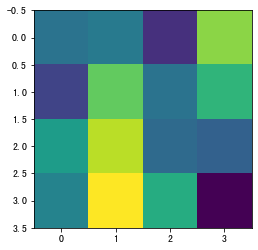

In [22]:
plt.imshow(filter_result)

## 用一张真实的图片来做上述操作

In [23]:
from PIL import Image

In [25]:
# 加上convert('L')，图片变成黑白，不加是彩色
dog_gray = Image.open('junjie.jpg').convert('L')

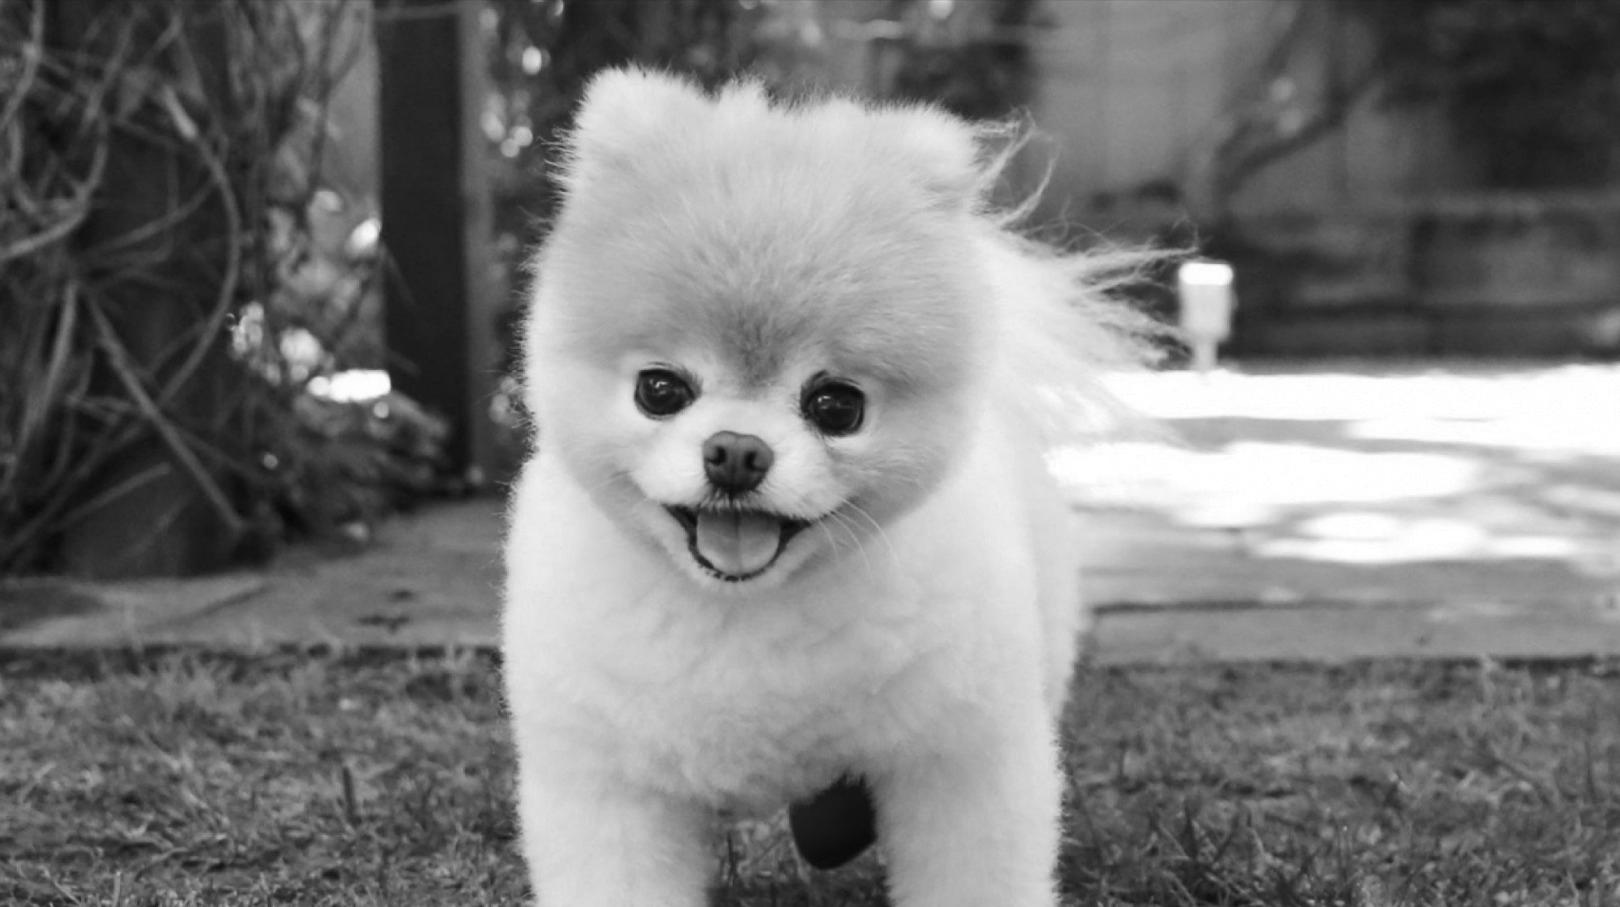

In [26]:
dog_gray

In [27]:
dog_array = np.array(dog_gray)

In [28]:
dog_array.shape

(907, 1620)

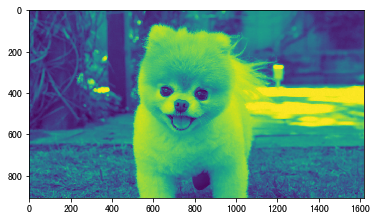

In [29]:
plt.imshow(dog_array)

In [46]:
window_width = filter_.shape[0]
window_height = filter_.shape[1]

dog_filter_result = np.zeros((
                dog_array.shape[0]-window_width+1, 
                dog_array.shape[1]-window_height+1
                ))

for h in range(dog_array.shape[0] - window_width + 1):
    for w in range(dog_array.shape[1] - window_height + 1):
        windows = dog_array[h: h + window_width, w: w + window_height]
        dog_filter_result[h][w] = (np.sum(np.multiply(windows, filter_)))

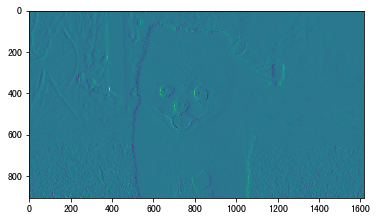

In [47]:
plt.imshow(dog_filter_result)

In [53]:
another_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

In [59]:
def SampleCNN(ImageArr,Filter):
    window_width = Filter.shape[0]
    window_height = Filter.shape[1]

    filter_result = np.zeros((
                    ImageArr.shape[0]-window_width+1, 
                    ImageArr.shape[1]-window_height+1
                    ))

    for h in range(ImageArr.shape[0] - window_width + 1):
        for w in range(ImageArr.shape[1] - window_height + 1):
            windows = ImageArr[h: h + window_width, w: w + window_height]
            filter_result[h][w] = (np.sum(np.multiply(windows, Filter)))

    return filter_result,plt.imshow(filter_result)

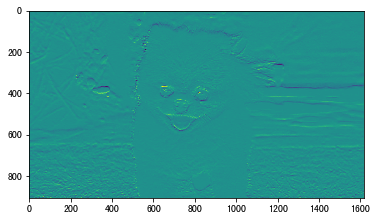

In [57]:
SampleCNN(dog_array,another_filter)

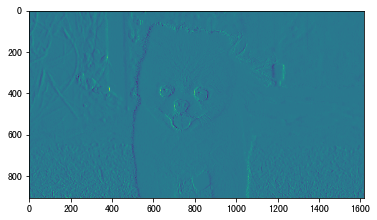

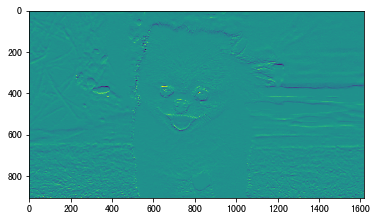

#### 两张图都把图片从很丰富的图像变成了轮廓明显的图像

#### 上述两张图的区别：
+ 底色不一样
+ 一张纵向拉伸，一张横向拉伸

### Given a filter,with weights
$$filter_ = [[w_{00},w_{01}],[...]...,[w_{i0},...,w_{ii}]]$$
$$output = \sum_{i\in|row|,j\in|column|}{w_{ij}*input_{ij}}$$
### 上述操作叫做卷积操作
### 来源：195几还是196几年的时候，有一群科学家，对猫进行试验，发现给猫看不同的东西，猫的脑子里的神经，不同的区域对不同的线条，颜色，轮廓会有不同的变化，这个区域和它在脑子里离视觉的远近有关系，而且活跃的时候是一块儿一块儿的在变化

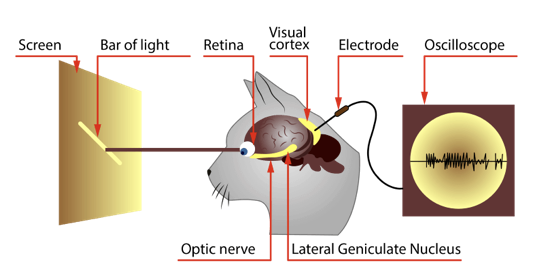

### 搞计算机的这些先驱们，就得到了启发，就说处理图像，可能需要一种，一块儿（scalar）的东西去处理
### 当时在通信里有类似的操作，不完全一样，把两种信号做叠加，后来计算机科学家就想，可不可以把一块儿一块儿的操作应用到对图形做处理
+ 经典的卷积核--垂直边沿分割卷积核

```python
filter_ = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
```

+ 经典的卷积核--横向边沿分割卷积核

```python
another_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
```

In [58]:
# 为啥叫垂直边沿分割卷积核
ver_array = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0]
])

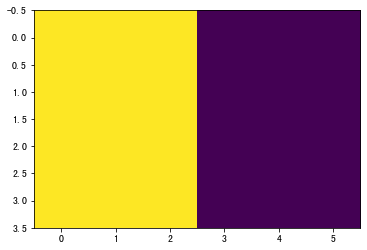

In [62]:
plt.imshow(ver_array)

(array([[ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.]]),
 <matplotlib.image.AxesImage at 0x7f72f09b6ed0>)

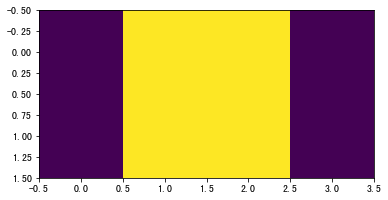

In [61]:
SampleCNN(ver_array,filter_)

#### 经过垂直边沿分割卷积核，原图变化较大，边沿明显的地方，经过处理后，值比较大

### 通过使用卷积这种方式，我们可以对图像进行变换

In [64]:
def conv(ImageArr,Filter):
    window_width = Filter.shape[0]
    window_height = Filter.shape[1]

    filter_result = np.zeros((
                    ImageArr.shape[0]-window_width+1, 
                    ImageArr.shape[1]-window_height+1
                    ))

    for h in range(ImageArr.shape[0] - window_width + 1):
        for w in range(ImageArr.shape[1] - window_height + 1):
            windows = ImageArr[h: h + window_width, w: w + window_height]
            filter_result[h][w] = (np.sum(np.multiply(windows, Filter)))

    return filter_result,plt.imshow(filter_result)

In [63]:
third_filter = np.random.normal(size=(5,5))*10

In [91]:
third_filter.shape

(5, 5)

In [92]:
third_filter

array([[  1.51217128,  -4.47249858,  -4.22196286, -11.02148956,
         -0.8839196 ],
       [  2.89392997,   1.32613265, -14.25109261, -12.48840554,
         -5.1861146 ],
       [  9.02035922,   6.63116643,   6.51650837,  -8.60764147,
          2.30079916],
       [-10.36144188,   6.04223179,   5.99247532,  26.29558677,
         -8.57059203],
       [ -3.70221909,  -6.13891577,  -1.47801999,   1.20397141,
          6.3409085 ]])

In [93]:
a = np.random.normal(size=(5,5))
a

array([[-0.93473359, -0.87551979, -0.50396078, -1.56965085,  0.09805289],
       [ 0.1136949 , -0.15285917, -0.83394068, -0.46950947, -1.72109299],
       [ 0.39404156, -0.09239013,  1.40076571, -0.33391065, -0.41814902],
       [-0.27925101, -0.36172201,  1.24264929, -0.75310506,  0.65504611],
       [ 0.18060792, -1.00283011,  1.87066843,  0.7679805 , -2.04618638]])

In [94]:
a*10

array([[ -9.34733589,  -8.75519787,  -5.03960775, -15.69650846,
          0.98052894],
       [  1.13694903,  -1.52859175,  -8.33940675,  -4.69509474,
        -17.21092989],
       [  3.94041561,  -0.92390126,  14.00765714,  -3.33910653,
         -4.18149023],
       [ -2.79251005,  -3.61722011,  12.42649289,  -7.53105063,
          6.55046115],
       [  1.80607921, -10.0283011 ,  18.70668432,   7.67980498,
        -20.46186381]])

(array([[-1070.41448113,  -992.12061077,  -928.79668402, ...,
          -669.32606135,  -643.30626003,  -605.6263499 ],
        [-1181.71337565, -1102.08218017, -1057.03579408, ...,
          -755.86215599,  -777.29539624,  -751.85376579],
        [-1114.15498138, -1042.45559662,  -970.44177303, ...,
          -746.07014014,  -796.45081815,  -805.39766527],
        ...,
        [ -720.08851325,  -888.26106395, -1190.90617864, ...,
         -1105.21933457, -1073.03740057, -1127.23188503],
        [-1436.39598122, -1344.66578149, -1414.69834253, ...,
         -1193.71341984, -1132.86568621, -1016.3432917 ],
        [-2079.47600272, -1911.23357353, -1853.05575717, ...,
         -1556.34702386, -1476.57599896, -1165.0906679 ]]),
 <matplotlib.image.AxesImage at 0x7f72f08999d0>)

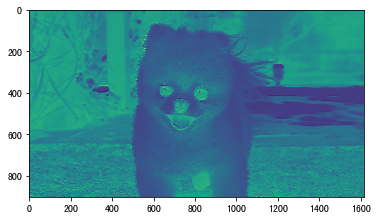

In [65]:
conv(dog_array,third_filter)

### 做了这些变换后，高亮出来的地方，和之前的数值就不一样了，在做计算的时候，对计算机来说，对数据做了一些处理，这个过程叫做特征处理

In [67]:
dog = Image.open('junjie.jpg')

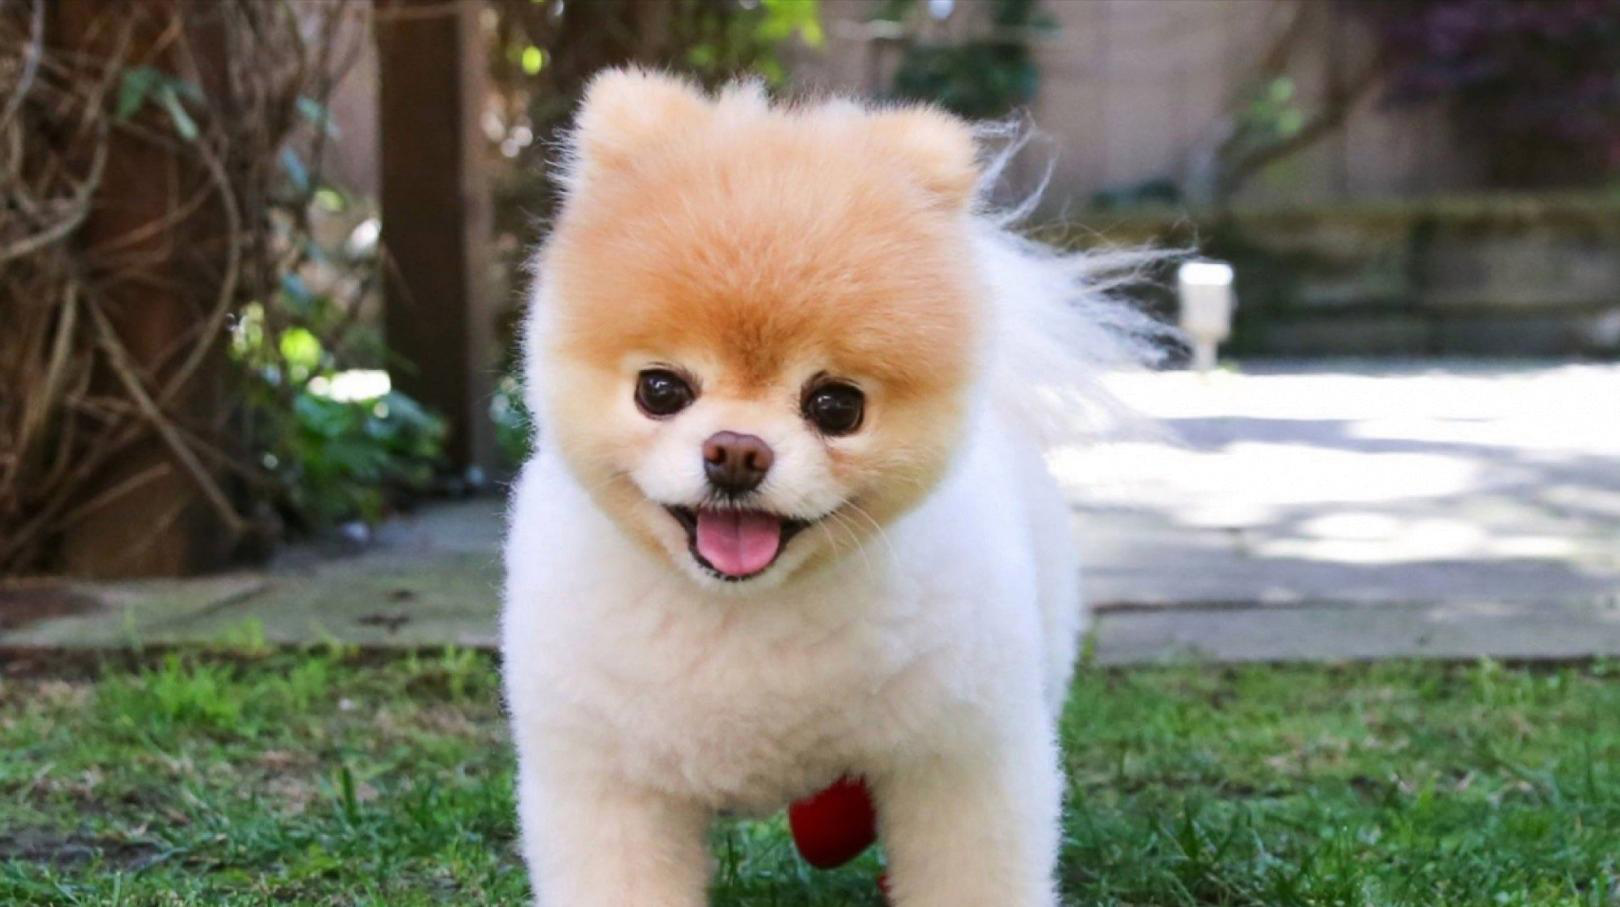

In [68]:
dog

In [69]:
dog_array = np.array(dog)
dog_array.shape #输出的3是rgb值，红绿蓝

(907, 1620, 3)

In [81]:
dog_array[:,0,0]

array([[[ 94,  80,  80],
        [ 90,  76,  75],
        [ 83,  69,  68],
        ...,
        [ 46,  39,  47],
        [ 46,  39,  47],
        [ 46,  39,  47]],

       [[ 96,  82,  81],
        [ 91,  77,  76],
        [ 85,  71,  70],
        ...,
        [ 48,  41,  48],
        [ 48,  41,  48],
        [ 48,  41,  48]],

       [[ 94,  80,  79],
        [ 90,  76,  75],
        [ 83,  69,  68],
        ...,
        [ 49,  43,  47],
        [ 49,  43,  47],
        [ 49,  43,  47]],

       ...,

       [[ 78, 119,  89],
        [ 73, 114,  84],
        [ 68, 109,  79],
        ...,
        [ 97, 116,  96],
        [ 93, 112,  92],
        [ 87, 106,  86]],

       [[ 61, 100,  73],
        [ 55,  94,  67],
        [ 51,  90,  61],
        ...,
        [ 92, 111,  91],
        [ 93, 112,  92],
        [ 91, 110,  90]],

       [[ 53,  89,  63],
        [ 47,  83,  57],
        [ 43,  79,  53],
        ...,
        [ 85, 107,  86],
        [ 90, 112,  91],
        [ 94, 116,  95]]

In [83]:
dog_array[0,:,0]

array([94, 90, 83, ..., 46, 46, 46], dtype=uint8)

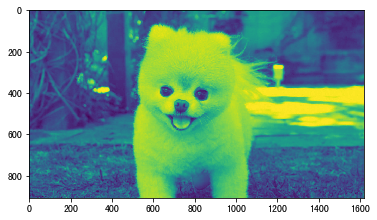

In [71]:
plt.imshow(dog_array[:,:,0]) # 红

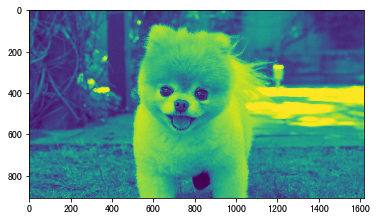

In [72]:
plt.imshow(dog_array[:,:,1]) # 绿

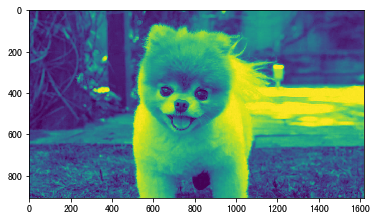

In [73]:
plt.imshow(dog_array[:,:,2]) # 蓝

(array([[33., 37., 28., ...,  4.,  0.,  0.],
        [32., 35., 26., ..., -1.,  0.,  0.],
        [30., 32., 23., ..., -1.,  0.,  0.],
        ...,
        [-6., 10., 31., ..., -3., 27., 30.],
        [13., 20., 33., ..., -2., 16., 23.],
        [30., 24., 26., ...,  2., -5.,  2.]]),
 <matplotlib.image.AxesImage at 0x7f72f0748450>)

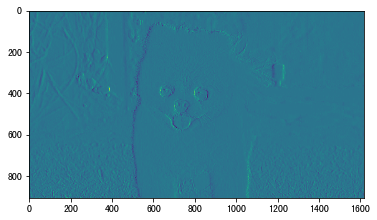

In [84]:
conv(dog_array[:,:,0],filter_)

#### 有颜色和没颜色的狗狗经过filter_，变成了同一张图片
### Hinton：Machine Learing ==>Make similar things not similar,make unsimilar things to be similar
### 机器学习真正在做的事情，使得相似的东西不相似，使得不相似的东西相似

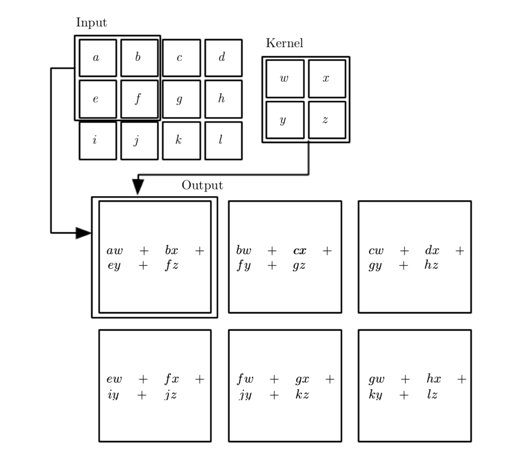

## Fast review
+ Filter Functions
+ Filter Size,Width,Height
+ Filter Step
+ Filter Num

## Next
+ Padding
+ Pooling
+ Fully Connected
+ 完整的计算机视觉分类问题


### 上边的例子是一个色道的，但其实大多数情况下，图像是三个色道的
+ 如果输入图片有多个channel，filter也需要变成和他一样厚
$$output = \sum_{i\in|row|,j\in|column|,k\in|channel|}{w_{ijk}*input_{ijk}}$$

In [89]:
volumn_filter = np.array([
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]
])
volumn_filter

array([[[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]]])

In [90]:
volumn_filter = np.array([filter_]*3)
volumn_filter

array([[[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]]])

In [95]:
volumn_third_filter = np.array([third_filter]*3)

In [96]:
volumn_third_filter.shape

(3, 5, 5)

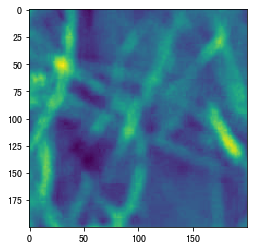

In [97]:
plt.imshow(dog_array[:200,:200,0])

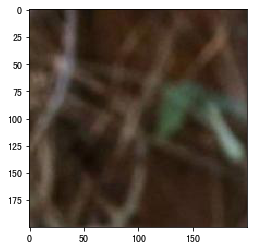

In [98]:
plt.imshow(dog_array[:200,:200,:])

In [99]:
# 改的地方
# window_width = Filter.shape[1]
# window_height = Filter.shape[2]
# windows = ImageArr[h: h + window_width, w: w + window_height,:]

def conv(ImageArr,Filter):
    window_width = Filter.shape[1]
    window_height = Filter.shape[2]

    filter_result = np.zeros((
                    ImageArr.shape[0]-window_width+1, 
                    ImageArr.shape[1]-window_height+1
                    ))

    for h in range(ImageArr.shape[0] - window_width + 1):
        for w in range(ImageArr.shape[1] - window_height + 1):
            windows = ImageArr[h: h + window_width, w: w + window_height,:]
            filter_result[h][w] = (np.sum(np.multiply(windows, Filter)))

    return filter_result,plt.imshow(filter_result)

(array([[134., 135., 139., ...,  36.,   3.,   3.],
        [139., 141., 145., ...,  41.,  12.,  12.],
        [145., 147., 151., ...,  53.,  30.,  30.],
        ...,
        [-78., -74., -70., ...,   4.,   6.,   6.],
        [-94., -88., -82., ...,  11.,   9.,   9.],
        [-97., -93., -87., ...,  11.,   3.,   3.]]),
 <matplotlib.image.AxesImage at 0x7f72f05b3110>)

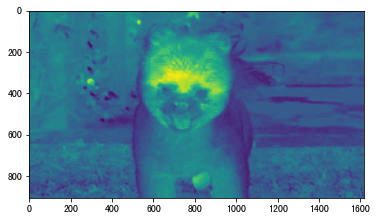

In [100]:
conv(dog_array,volumn_filter)

### 关于filter的参数
+ 1.Width,Height,Channel

> filter的厚度Channel会不会影响输出图像的大小？

> 我理解的是不受channel的大小，channel的大小和图像的厚度一样

+ 2.filter num 卷积核的个数

In [104]:
volumn_filter_1 = np.array([
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]
])

volumn_filter_2 = np.array([
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ],
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ],
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ]
])

volumn_filter_3 = np.random.normal(size=(3, 3, 3))

volumn_filter_4 = np.array([
    [
        [0, 1, 0],
        [-1, 0, -1],
        [0, 1, 0]
    ],
    [
        [0, 1, 0],
        [-1, 0, -1],
        [0, 1, 0]
    ],
    [
        [0, 1, 0],
        [-1, 0, -1],
        [0, 1, 0]
    ]
])


filters = [
    volumn_filter_1,
    volumn_filter_2,
    volumn_filter_3,
    volumn_filter_4
]

In [109]:
# 可以经过多个卷积核
def conv(ImageArr,Filters):
    window_width = Filters[0].shape[1]
    window_height = Filters[0].shape[2]

    filter_result = np.zeros((
                    ImageArr.shape[0]-window_width+1, 
                    ImageArr.shape[1]-window_height+1,
                    len(Filters)
                    ))
    
    for fi,f in enumerate(Filters):
        for h in range(ImageArr.shape[0] - window_width + 1):
            for w in range(ImageArr.shape[1] - window_height + 1):
                windows = ImageArr[h: h + window_width, w: w + window_height,:]
                filter_result[h][w][fi] = (np.sum(np.multiply(windows, f)))

    return filter_result

In [110]:
volumn_conv_output = conv(dog_array,filters)

In [111]:
volumn_conv_output.shape # 4就是channel

(905, 1618, 4)

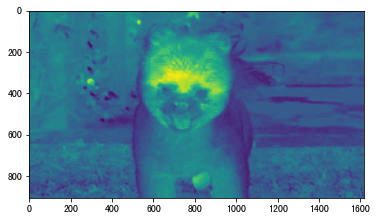

In [112]:
plt.imshow(volumn_conv_output[:,:,0]) # channel 1

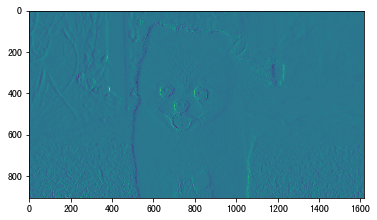

In [113]:
plt.imshow(volumn_conv_output[:,:,1]) # channel 2

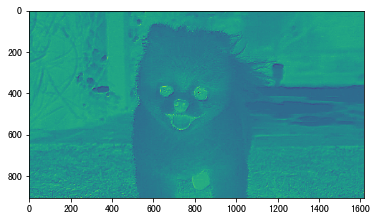

In [114]:
plt.imshow(volumn_conv_output[:,:,2]) # channel 3

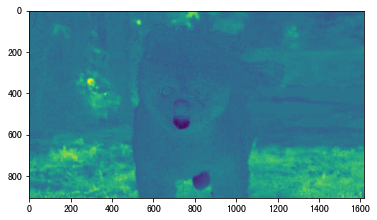

In [116]:
plt.imshow(volumn_conv_output[:,:,3]) # channel 4

#### 可以取不同的filters，每个不同的filter是取了不同特点

## 问题：产出的volumn_conv_output.shape有三个值(905, 1618, 4)，影响卷积输出结果数字的因素有哪些？
## 影响卷积输出的因素：
+ 1.输入的weight 和 height
+ 2.filter的weight 和 height
+ 3.filter的个数

## 除了这个之外还有哪些影响因素
+ 前边是一格一格的移动，有没有可能移动的更快一些，把这个移动的格数，叫做卷积核的步长

In [117]:
import math

In [118]:
math.ceil(1.3) # 向上取整

2

#### 步长不为1的卷积完后，长度变为

$$向上取整：\frac{Input_{width} - Filter_{width} + 1}{Stride}$$

In [119]:
# 卷积核步长
def conv(ImageArr,Filters,stride=1):
    window_width = Filters[0].shape[1]
    window_height = Filters[0].shape[2]

    filter_result = np.zeros((
                    math.ceil((ImageArr.shape[0]-window_width+1)/stride), 
                    math.ceil((ImageArr.shape[1]-window_height+1)/stride),
                    len(Filters)
                    ))
    
    for fi,f in enumerate(Filters):
        for h in range(0,ImageArr.shape[0] - window_width + 1,stride):
            for w in range(0,ImageArr.shape[1] - window_height + 1,stride):
                windows = ImageArr[h: h + window_width, w: w + window_height,:]
                filter_result[h//stride][w//stride][fi] = (np.sum(np.multiply(windows, f)))

    return filter_result

In [123]:
volumn_conv_output = conv(dog_array,filters,stride=2)

In [127]:
dog_array.shape

(907, 1620, 3)

In [124]:
volumn_conv_output.shape

(453, 809, 4)

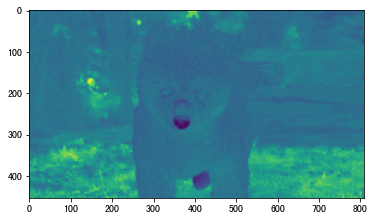

In [126]:
plt.imshow(volumn_conv_output[:,:,3])

## 影响卷积输出的因素：
+ 1.输入的weight 和 height
+ 2.filter的weight 和 height
+ 3.filter的个数
+ 4.步长：Stride  -- Stride越大，丢掉的信息越多，维度成倍的缩小

### 1.随着卷积核的计算，图像大小越变越小
### 2.不是边沿的点，filter会计算多次，在边沿的点，只会计算一次，假如图像的边沿有很重要的信息，但是只会计算一次
## 为了解决上述两个问题，提出了padding，在周围补零
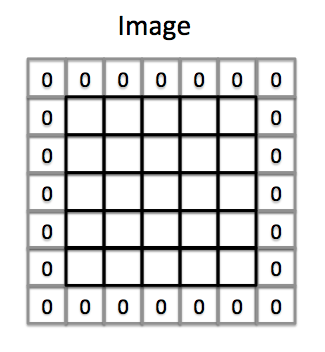

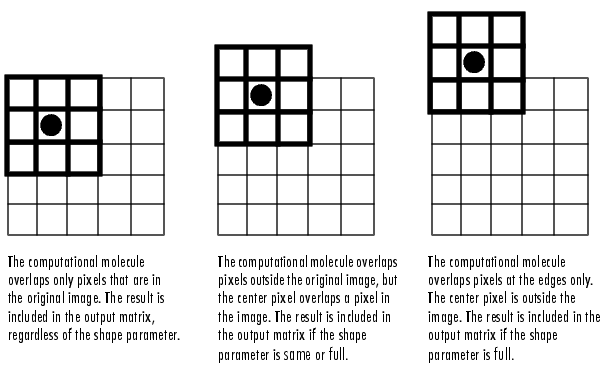

### Padding的作用
+ 1.随着卷积核的计算，不让图像越变越小
+ 2.边沿的点可以计算多次

In [128]:
def conv_flatten(ImageArr,Filter):
    window_width = Filter.shape[0]
    window_height = Filter.shape[1]

    filter_result = np.zeros((
                    ImageArr.shape[0]-window_width+1, 
                    ImageArr.shape[1]-window_height+1
                    ))

    for h in range(ImageArr.shape[0] - window_width + 1):
        for w in range(ImageArr.shape[1] - window_height + 1):
            windows = ImageArr[h: h + window_width, w: w + window_height]
            filter_result[h][w] = (np.sum(np.multiply(windows, Filter)))

    return filter_result,plt.imshow(filter_result)

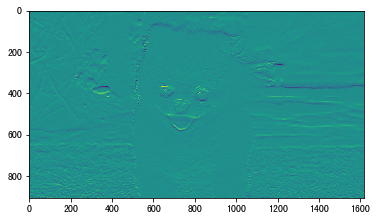

In [130]:
flatten_output = conv_flatten(dog_array[:,:,0],another_filter)

In [133]:
dog_array[:,:,0].shape

(907, 1620)

In [132]:
flatten_output[0].shape

(905, 1618)

In [134]:
# Padding np.pad(array,前边加多少后边加多少,怎么添加)
dog_array_with_padding = np.pad(dog_array[:,:,0],[1,1],'constant')

In [135]:
dog_array_with_padding

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 94, 90, ..., 46, 46,  0],
       [ 0, 96, 91, ..., 48, 48,  0],
       ...,
       [ 0, 61, 55, ..., 93, 91,  0],
       [ 0, 53, 47, ..., 90, 94,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [136]:
dog_array_with_padding.shape

(909, 1622)

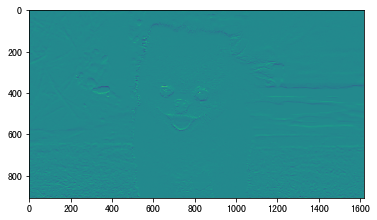

In [137]:
padding_flatten_output = conv_flatten(dog_array_with_padding,another_filter)

In [138]:
padding_flatten_output[0].shape

(907, 1620)

#### Padding
+ 1.输入dog_array[:,:,0].shape---(907, 1620)，输出padding_flatten_output[0].shape---(907, 1620)，大小不变
+ 2.边沿的地方，多次计算

## 影响卷积输出的因素：
+ 1.输入的weight 和 height
+ 2.filter的weight 和 height
+ 3.filter的个数
+ 4.步长：Stride  -- Stride越大，丢掉的信息越多，维度成倍的缩小
+ 5.padding的个数

#### padding的方法有两种
+ 1.Vaild padding:没有padding，保持有效数字
+ 2.Zero Padding/Same Padding 用零填充

#### channel 和 filters 的个数有什么区别？ 这里不是很懂
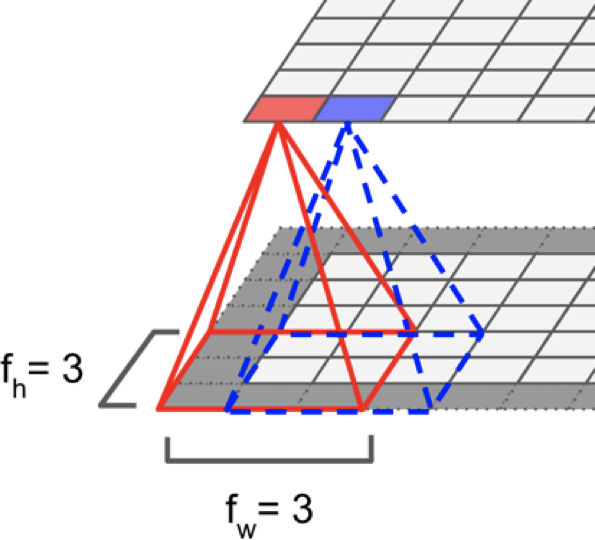

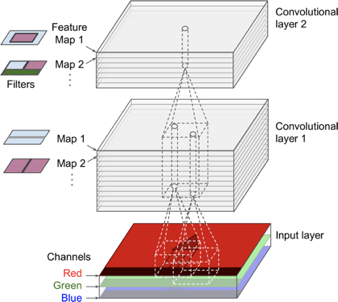

## 非常重要的两个特性
+ 1.权值共享:Parameters Sharing，权值可以不一样，权值共享相当于所有的权值用同一个，可以减少参数
+ 2.位置不变性，平移不变性：Location Invariant

## 问题：CNN有位置不变性，有没有大小不变性Scalar Invariant
> 单个一层的话，不能实现Scalar Invariant

## 为了进一步减少参数，叫做Pooling
+ 红色区域取最大，得到6
+ 绿色区域取最大，得到8
+ 黄色区域取最大，得到3
+ 蓝色区域取最大，得到4
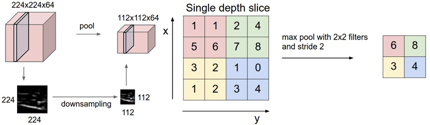

In [159]:
# polling
def pool(ImageArr,pooling_size,stride=1):
    pooling_result = np.zeros((
                    math.ceil((ImageArr.shape[0]-pooling_size[0]+1)/stride), 
                    math.ceil((ImageArr.shape[1]-pooling_size[1]+1)/stride)
                    ))
    
    for h in range(0,ImageArr.shape[0] - pooling_size[0] + 1,stride):
        for w in range(0,ImageArr.shape[1] - pooling_size[1] + 1,stride):
            windows = ImageArr[h: h + pooling_size[0], w: w + pooling_size[1]]
            pooling_result[h//stride][w//stride] = np.max(windows)

    return pooling_result

In [160]:
volumn_conv_output[:,:,0].shape

(453, 809)

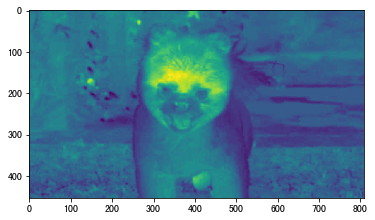

In [161]:
plt.imshow(volumn_conv_output[:,:,0])

In [162]:
p_output = pool(volumn_conv_output[:,:,0],pooling_size=(10,10))

In [163]:
p_output

array([[315., 303., 297., ..., 104., 104., 104.],
       [315., 303., 297., ...,  99.,  99.,  98.],
       [315., 303., 297., ...,  94.,  94.,  94.],
       ...,
       [157., 138., 136., ..., 166., 166., 166.],
       [157., 138., 136., ..., 175., 175., 175.],
       [157., 138., 136., ..., 195., 195., 195.]])

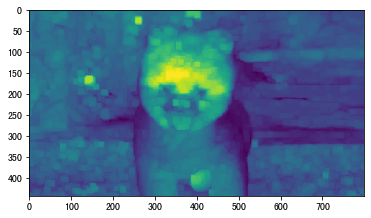

In [164]:
plt.imshow(p_output)

In [165]:
p_output.shape

(444, 800)

In [166]:
p_output = pool(volumn_conv_output[:,:,0],pooling_size=(10,10),stride=2)

In [167]:
p_output.shape

(222, 400)

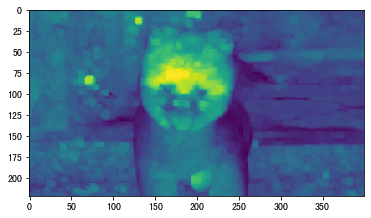

In [168]:
plt.imshow(p_output)

### Pooling又减少了训练时所需要的参数
+ 此处pooling处理的图像volumn_conv_output[:,:,0]，是cnn处理后的图像
+ 一般先用cnn，再用pooling,也可以先pooling，再cnn
+ pooling常用的有两种模式：max mean

In [169]:
# polling max mean
def pool(ImageArr,pooling_size,stride=1,pool_mode='max'):
    pooling_result = np.zeros((
                    math.ceil((ImageArr.shape[0]-pooling_size[0]+1)/stride), 
                    math.ceil((ImageArr.shape[1]-pooling_size[1]+1)/stride)
                    ))
    
    pooling_funcs = {
        'mean': np.mean,
        'max': np.max
    }
    
    for h in range(0,ImageArr.shape[0] - pooling_size[0] + 1,stride):
        for w in range(0,ImageArr.shape[1] - pooling_size[1] + 1,stride):
            windows = ImageArr[h: h + pooling_size[0], w: w + pooling_size[1]]
            pooling_result[h//stride][w//stride] = pooling_funcs[pool_mode](windows)

    return pooling_result

In [170]:
p_output = pool(volumn_conv_output[:,:,0],pooling_size=(10,10),stride=2,pool_mode='mean')

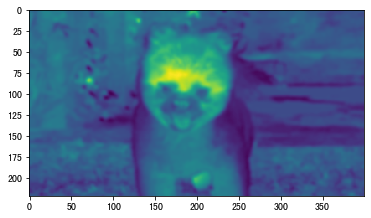

In [171]:
plt.imshow(p_output)

## 影响卷积输出的因素：
+ 1.输入的weight 和 height
+ 2.filter的weight 和 height
+ 3.filter的个数
+ 4.步长：Stride  -- Stride越大，丢掉的信息越多，维度成倍的缩小
+ 5.padding的个数
+ 6.Pooling 池化操作

## 可以进行多次卷积操作，卷积操作完得到一个类似于(222, 400)的高维向量
## 得到高维向量后，进行wx+b

## Give Fully Connected Layer to a linear function

In [174]:
# 全连接操作
flatten = p_output.reshape(1,-1)

In [175]:
flatten.shape

(1, 88800)

In [178]:
# 做一个10分类
class_num = 10

weight = np.random.uniform(size=(flatten.shape[1], class_num))
bias = np.zeros(class_num)

In [179]:
np.matmul(flatten, weight) + bias

array([[5810965.44661124, 5840122.12060478, 5781823.7763249 ,
        5770652.86171874, 5793997.75433595, 5793294.86406522,
        5787633.15946315, 5796930.65463711, 5823253.42874537,
        5779431.83006614]])

In [180]:
# 做一个5分类
class_num = 5

weight = np.random.uniform(size=(flatten.shape[1], class_num))
bias = np.zeros(class_num)
np.matmul(flatten, weight) + bias

array([[5766432.45130583, 5800175.98425434, 5774770.01929308,
        5827968.77525386, 5770352.29440194]])

## Fully Connected Layer
+ 1.融合之前所提取的特征
+ 2.送入线性变化

## 进行wx+b后，得到上述数字，把上述数字送入softmax,然后进行cross entropy,然后求loss

In [181]:
def softmax(inp): 
    inp = inp - np.max(inp)
    
    ep = np.exp(inp)
    
    return ep / np.sum(ep)

In [182]:
softmax(np.matmul(flatten, weight) + bias)

array([[0., 0., 0., 1., 0.]])

In [183]:
def cross_entropy(ytrues, yhats):
    loss = 0
    
    eps = 1e-10 
    
    for i, y in enumerate(ytrues):
        loss += np.sum(y[j] * np.log((yhats[i][j]) + eps) for j in range(len(y)))
    
    loss *= -1
    
    return loss

In [184]:
cross_entropy([[0, 0, 0, 1, 0]], softmax(np.matmul(flatten, weight) + bias))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


-1.000000082690371e-10

In [185]:
cross_entropy([[0, 0, 1, 0, 0]], softmax(np.matmul(flatten, weight) + bias))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


23.025850929940457

## A Complete Example

In [186]:
import torchvision

In [187]:
import torch

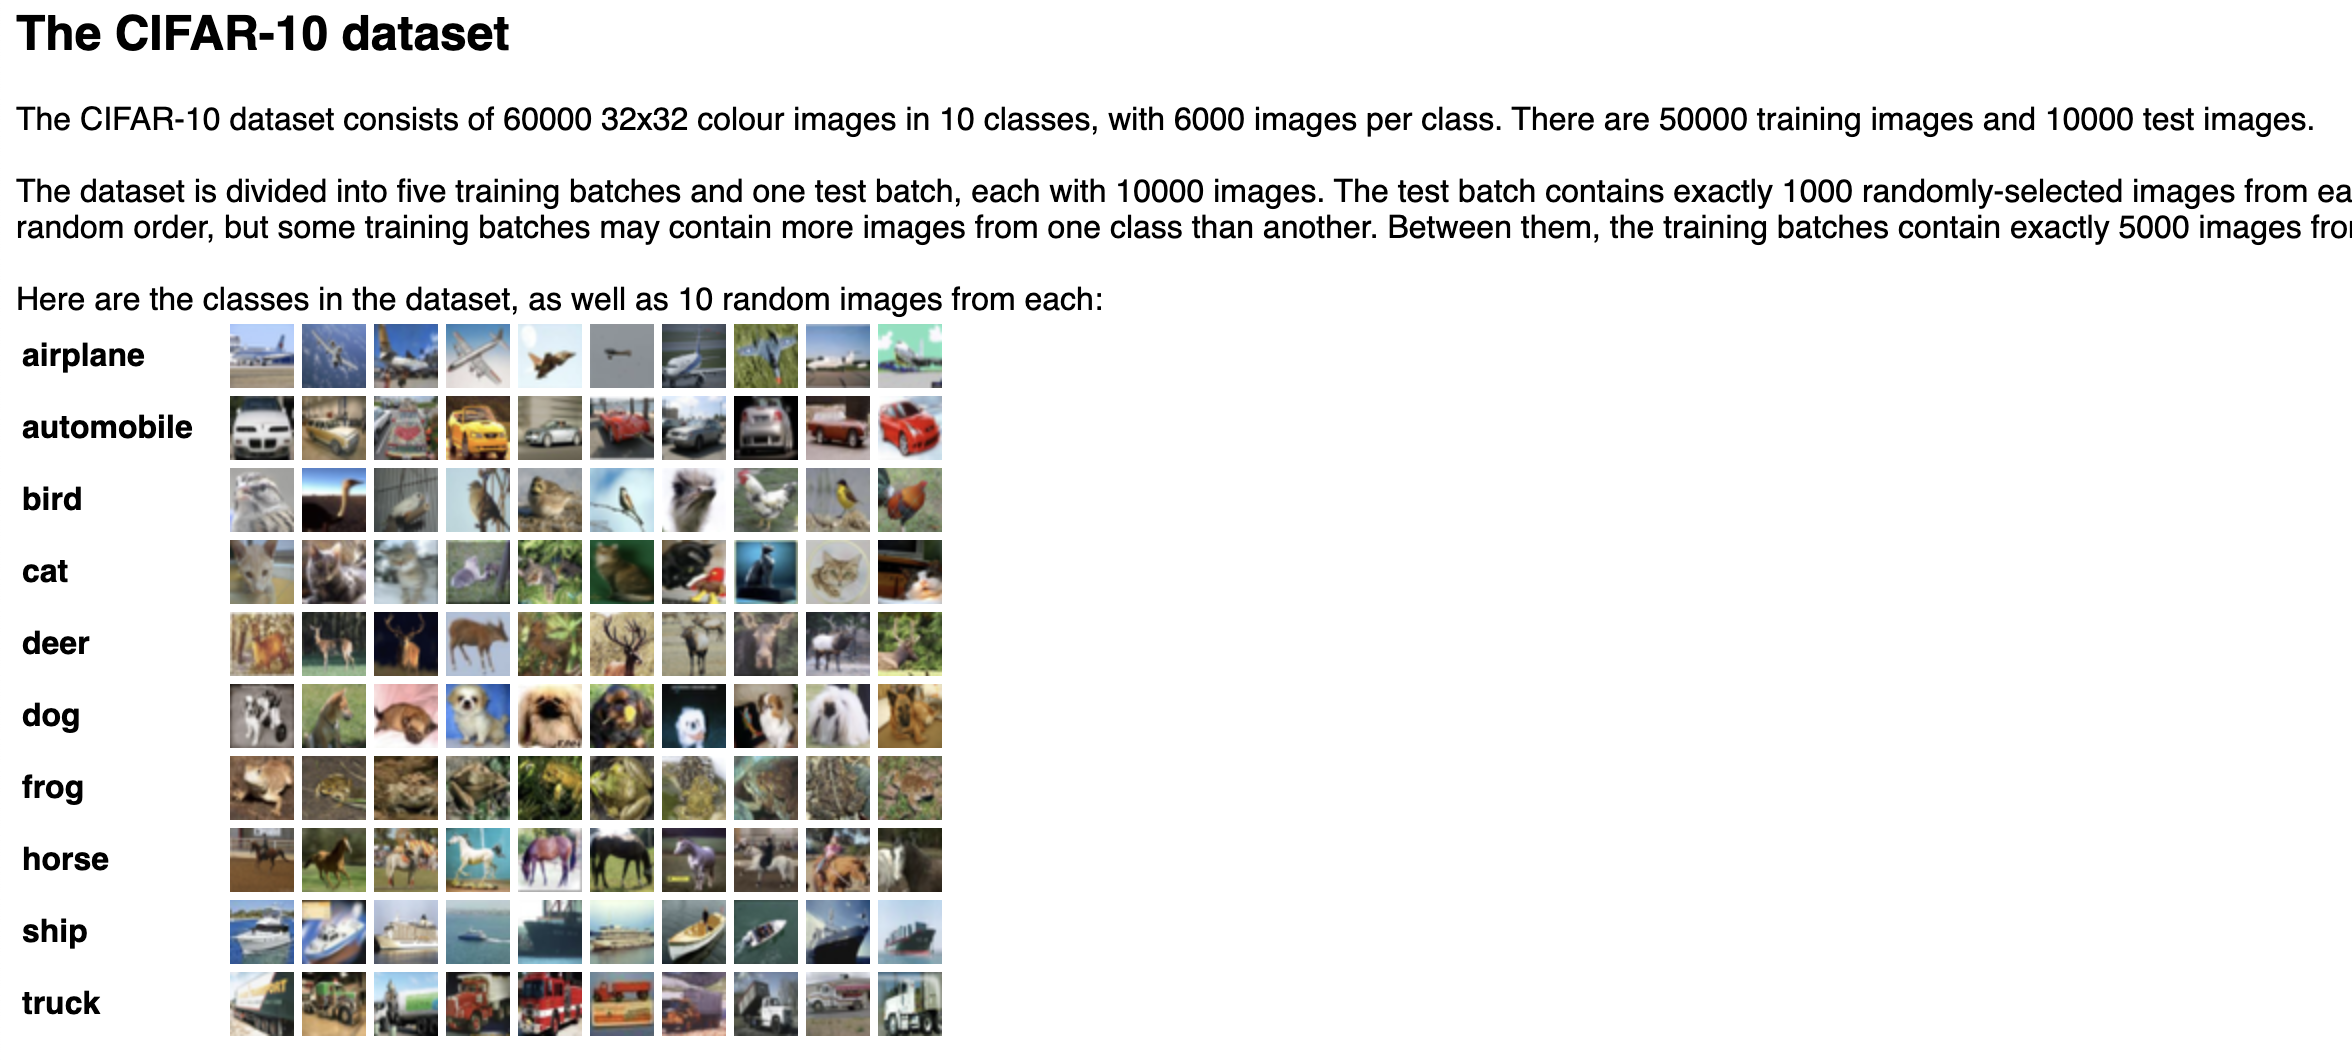

In [188]:
kind_and_index = [
    '飞机',
    '汽车',
    '小鸟',
    '猫咪',
    '小鹿',
    '小狗',
    '青蛙',
    '小马',
    '船舶',
    '卡车'
]

In [189]:
cifar_10 = torchvision.datasets.CIFAR10('.', download=True, transform=torchvision.transforms.ToTensor())

Extracting ./cifar-10-python.tar.gz to .


In [190]:
cifar_10_test = torchvision.datasets.CIFAR10('.', download=True, train=False, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [193]:
len(cifar_10)

50000

In [191]:
len(cifar_10_test)

10000

In [195]:
cifar_10[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [192]:
cifar_10[0][0].shape

torch.Size([3, 32, 32])

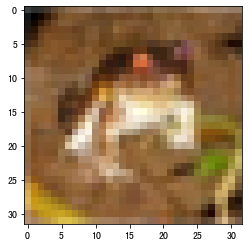

In [196]:
# 为了训练方便，第一个维度是channel，用.permute(1, 2, 0)把维度重新排序，第一个维度放在第0个，第二个维度放在第1个，第零个维度放在第2个
plt.imshow(cifar_10[0][0].permute(1, 2, 0))

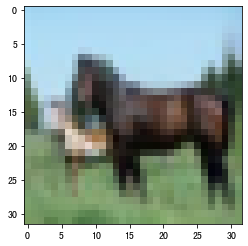

In [198]:
plt.imshow(cifar_10[12][0].permute(1, 2, 0))

## Splid Train and Validation

In [199]:
from torch.utils.data import random_split

In [201]:
# 拆分训练集与验证集
train, validation = random_split(cifar_10, lengths=( int(len(cifar_10) * 0.8), 
                                                     int(len(cifar_10) * 0.2)))

In [202]:
len(train)

40000

In [203]:
# 把数据随机打乱
train_loader = torch.utils.data.DataLoader(train,
                                          batch_size=4,
                                          shuffle=True)

In [204]:
from torch import nn

In [207]:
??nn.Conv2d

In [208]:
# nn.Conv2d(
#     in_channels: int,                          # RGB--3
#     out_channels: int,                         # filters的个数
#     kernel_size: Union[int, Tuple[int, int]],  # filters的kernel
# )
conv = torch.nn.Conv2d(3, 16, kernel_size=3)

In [209]:
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [211]:
# 初始化权重
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0282, -0.1503,  0.1526],
                        [-0.1147, -0.1520, -0.1400],
                        [ 0.1272,  0.0737,  0.1146]],
              
                       [[-0.0491,  0.0015, -0.1390],
                        [-0.1542, -0.1222,  0.0919],
                        [ 0.1511, -0.1348, -0.0782]],
              
                       [[ 0.1340, -0.0676, -0.0571],
                        [-0.1412, -0.1400,  0.1088],
                        [-0.1772,  0.1131,  0.0084]]],
              
              
                      [[[-0.1527, -0.1897,  0.1297],
                        [ 0.0765, -0.0756, -0.1033],
                        [-0.1805,  0.0737,  0.1873]],
              
                       [[-0.1597,  0.0456, -0.1364],
                        [-0.0168, -0.1188, -0.0545],
                        [ 0.0889,  0.0971,  0.1407]],
              
                       [[-0.1423,  0.1853, -0.1464],
                        [ 0.0322

In [213]:
# 16个filters,每个的size是3*3，每个厚度是3
conv.state_dict()['weight'].shape

torch.Size([16, 3, 3, 3])

In [214]:
conv1 = torch.nn.Conv2d(4, 15, kernel_size=2)

In [216]:
conv1.state_dict()['weight'].shape

torch.Size([15, 4, 2, 2])